<a href="https://colab.research.google.com/github/manoj-bheemireddy/paddy-plant-disease-detection-system/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Rice-Leaf-Disease-Images',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Rice-Leaf-Disease-Images',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='validation')


Found 4747 images belonging to 4 classes.
Found 1186 images belonging to 4 classes.


In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
history = model.fit(train_generator, epochs=50, validation_data=validation_generator)


Epoch 1/50
149/149 [==============================] - 1204s 8s/step - loss: 1.0430 - accuracy: 0.5534 - val_loss: 0.8762 - val_accuracy: 0.6636
Epoch 2/50
149/149 [==============================] - 291s 2s/step - loss: 0.6652 - accuracy: 0.7512 - val_loss: 0.6103 - val_accuracy: 0.7614
Epoch 3/50
149/149 [==============================] - 307s 2s/step - loss: 0.5098 - accuracy: 0.8117 - val_loss: 0.4738 - val_accuracy: 0.8153
Epoch 4/50
149/149 [==============================] - 291s 2s/step - loss: 0.3276 - accuracy: 0.8766 - val_loss: 0.6473 - val_accuracy: 0.7825
Epoch 5/50
149/149 [==============================] - 310s 2s/step - loss: 0.2412 - accuracy: 0.9162 - val_loss: 0.3022 - val_accuracy: 0.8921
Epoch 6/50
149/149 [==============================] - 286s 2s/step - loss: 0.1734 - accuracy: 0.9395 - val_loss: 0.2153 - val_accuracy: 0.9325
Epoch 7/50
149/149 [==============================] - 285s 2s/step - loss: 0.1504 - accuracy: 0.9475 - val_loss: 0.2131 - val_accuracy: 0.919

In [7]:
score = model.evaluate(validation_generator)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])


38/38 [==============================] - 20s 517ms/step - loss: 0.0306 - accuracy: 0.9941
Validation loss: 0.030640529468655586
Validation accuracy: 0.9940978288650513


In [8]:
import matplotlib.pyplot as plt

In [9]:
model.save('/content/drive/MyDrive/trained2')




1.   performance of the model during training
2.   plot loss and accuracy



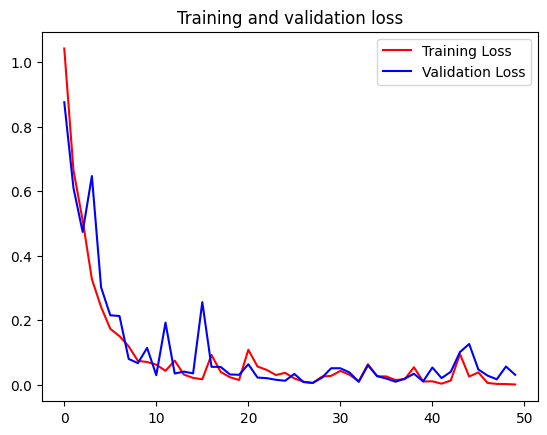

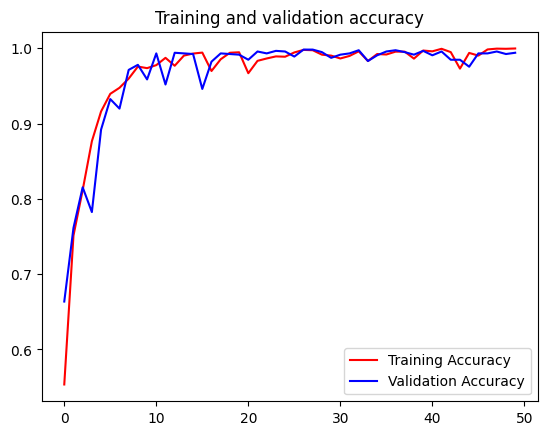

<Figure size 640x480 with 0 Axes>

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(train_loss))

plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()

Confusion matrix

38/38 [==============================] - 21s 545ms/step


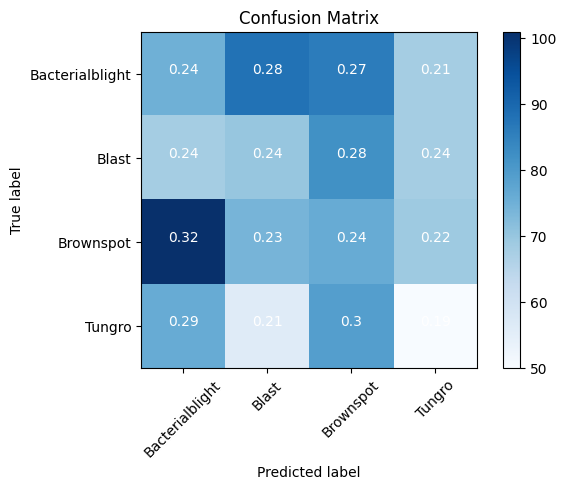

In [11]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Generate predictions for the validation data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels for the validation data
y_true = validation_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(validation_generator.class_indices))
plt.xticks(tick_marks, validation_generator.class_indices, rotation=45)
plt.yticks(tick_marks, validation_generator.class_indices)

# Normalize the confusion matrix
cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)

# Add labels to the confusion matrix
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Classification Report

In [12]:
from sklearn.metrics import classification_report

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report:\n', classification_report(validation_generator.classes, y_pred))

38/38 [==============================] - 20s 523ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.25      0.25       317
           1       0.25      0.25      0.25       288
           2       0.28      0.28      0.28       320
           3       0.23      0.23      0.23       261

    accuracy                           0.25      1186
   macro avg       0.25      0.25      0.25      1186
weighted avg       0.25      0.25      0.25      1186



Roc curve

38/38 [==============================] - 22s 568ms/step


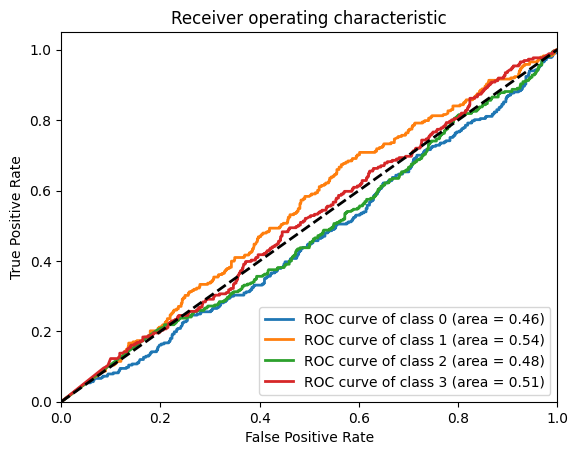

In [16]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate predictions for the validation data
Y_pred = model.predict(validation_generator)

# Get the true labels for the validation data
y_true = validation_generator.classes

# Convert class indices to one-hot encoded labels
y_true = to_categorical(y_true, num_classes=len(validation_generator.class_indices))

# Get the number of classes
num_classes = y_true.shape[1]

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('/content/drive/MyDrive/Trained model')

# Load and preprocess the input image
img_path = '/content/drive/MyDrive/Rice-Leaf-Disease-Images/Tungro/TUNGRO1_034.jpg'
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.

# Make a prediction on the input image
preds = model.predict(x)

# Manually specify the class labels
class_labels = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']

# Get the predicted class label
pred_label = class_labels[np.argmax(preds)]

# Print the predicted class label or "Not Recognized" if unknown
if pred_label == 'unknown':
    print('Leaf disease not recognized. Please try another image.')
else:
    print('The leaf disease is:', pred_label)

1/1 [==============================] - 0s 102ms/step
The leaf disease is: Tungro
